This notebook has been used to do an exploratory analysis on 2012-2013 Kenya Financial Diaries. I first start by loading the packages I am going to use for the analysis.

In [3]:
import os
import pandas as pd #for dataframes
import datetime as dt #for date times
import numpy as np #for datastructure
import matplotlib.pyplot as plt #for the graphs
import seaborn as sns # fro visualization 

# Loading the financial diaries dataset using the pandas library

In [4]:
fdd_data = pd.read_csv("diaries_transactions_all.csv")

c:\users\chris\projects\kamilimuds\.kamilimuds\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
fdd_data.columns

Index(['hh_ids', 'unique_hhs', 'first_trx_date_hh', 'last_trx_date_hh',
       'tot_hh_daysofobs', 'tot_hh_monthsofobs', 'interview_designation',
       'int_date', 'int_month', 'int_year', 'int_yr_mo', 'first_int_date',
       'account_ids', 'unique_accnts', 'm_ids_owner', 'unique_hm_owner',
       'account_bsheet_desig', 'account_startclose_balance', 'account_formal',
       'account_liquid', 'first_trx_date_acc', 'last_trx_date_acc',
       'tot_acc_daysofobs', 'tot_acc_monthsofobs', 'trx_id', 'm_ids_trx',
       'trx_date', 'trx_month', 'trx_year', 'trx_yr_mo', 'trx_dq_round',
       'trx_stdtime_days_hh', 'trx_stdtime_mnths_hh', 'trx_stdtime_days_acc',
       'trx_stdtime_mnths_acc', 'trx_class_code', 'trx_class_desc',
       'trx_family_code', 'trx_family_desc', 'trx_type_code', 'trx_type_desc',
       'trx_prx_purpose', 'trx_prx_purpose_fd', 'trx_fee',
       'trx_bsheet_direction', 'trx_mode_code', 'trx_mode_desc',
       'trx_place_incommunity', 'trx_distance_km', 'trx_outlet'

Exploratory data analysis (EDA) is an approach to analyzing data sets to summarize their main characteristics, often with visual methods. Before applying any ML algorithms in data, we need to understand the data which we are going to follow. Without data understanding there will be a possibility of ML model failure. The understanding of data is nothing but this Exploratory Data Analysis (EDA)

In [6]:
fdd_data.head(5)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
0,KELDL02,NaN,03sep2012,02oct2013,394,13,04=Diaries Interview,02oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.586210
1,KVIHC16,NaN,24sep2012,19sep2013,360,12,04=Diaries Interview,22apr2013,4,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,7.206897
2,KELDK21,NaN,20sep2012,22oct2013,397,13,04=Diaries Interview,02oct2013,10,2013,...,NaN,NaN,NaN,0.0,0.000000,0,NaN,NaN,NaN,13.000000
3,KMOMT22,NaN,21sep2012,01nov2013,406,14,04=Diaries Interview,21feb2013,2,2013,...,NaN,NaN,Inflow,710.0,8.352942,0,NaN,NaN,NaN,4.793103
4,KMOMT32,NaN,20sep2012,18oct2013,393,13,04=Diaries Interview,02may2013,5,2013,...,NaN,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.517241


In [7]:
fdd_data.tail(5)

,hh_ids,unique_hhs,first_trx_date_hh,last_trx_date_hh,tot_hh_daysofobs,tot_hh_monthsofobs,interview_designation,int_date,int_month,int_year,...,trx_distance_km,trx_outlet,trx_direction,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_units,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
483944,KZIMA08,NaN,21mar2013,21oct2013,214,7,04=Diaries Interview,02aug2013,8,2013,...,0.378316,NaN,Outflow,30.0,0.352941,0,NaN,NaN,NaN,4.586207
483945,KZIMA08,NaN,21mar2013,21oct2013,214,7,04=Diaries Interview,04oct2013,10,2013,...,0.378316,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,6.448276
483946,KZIMA08,NaN,21mar2013,21oct2013,214,7,04=Diaries Interview,21aug2013,8,2013,...,0.378316,"08=Restaurant, bar, hotel, cyber",Outflow,50.0,0.588235,0,NaN,NaN,NaN,4.827586
483947,KMOMK03,NaN,07sep2012,25oct2013,413,14,04=Diaries Interview,01aug2013,8,2013,...,74.572090,"10=Institution (clinic, school, church, etc.)",Outflow,1650.0,19.411760,0,NaN,NaN,NaN,10.965520
483948,KMOMM11,NaN,17aug2012,04oct2013,413,14,04=Diaries Interview,01nov2012,11,2012,...,1.590156,NaN,Outflow,100.0,1.176471,0,NaN,NaN,NaN,2.413793


In the above, past actions, and with just a glance at how exactly the structure of the dataset looks like, we have some fields with missing values.

In [9]:
#Code to check the exact number of rows and columns in our financial diaries dataset.
fdd_data.shape

(483949, 58)

In [10]:
fdd_data.describe()

,unique_hhs,tot_hh_daysofobs,tot_hh_monthsofobs,int_month,int_year,unique_accnts,unique_hm_owner,tot_acc_daysofobs,tot_acc_monthsofobs,trx_id,...,trx_fee,trx_mode_code,trx_place_incommunity,trx_distance_km,trx_value_kes,trx_value_usd,ddd_gift,trx_inkind_value_usd,trx_inkind_value_kes,trx_stdtime_mnths_hh_nr
count,298.0,483949.000000,483949.000000,483949.000000,483949.000000,9546.0,670.0,483949.000000,483949.000000,4.839490e+05,...,77070.000000,476292.000000,457703.000000,457498.000000,4.834300e+05,483430.000000,483949.000000,12798.000000,12798.000000,483949.000000
mean,1.0,394.805825,13.125895,6.426041,2012.847717,1.0,1.0,421.460920,14.157174,7.068031e+16,...,0.067679,2.199067,0.869527,6.824379,6.547228e+02,7.702621,0.003350,3.616619,307.412564,7.336331
std,0.0,32.657529,1.141561,3.204513,0.359490,0.0,0.0,118.927981,4.169955,1.964200e+16,...,0.251195,3.461173,0.336824,79.340121,5.453241e+03,64.155778,0.057778,28.127688,2390.853350,3.766231
min,1.0,214.000000,7.000000,1.000000,2012.000000,1.0,1.0,0.000000,0.000000,3.413549e+16,...,0.000000,1.000000,0.000000,0.000000,-2.595000e+04,-305.294100,0.000000,0.000000,0.000000,0.000000
25%,1.0,375.000000,12.000000,4.000000,2013.000000,1.0,1.0,358.000000,12.000000,5.713807e+16,...,0.000000,1.000000,1.000000,0.000000,2.000000e+01,0.235294,0.000000,0.000000,0.000000,4.275862
50%,1.0,391.000000,13.000000,7.000000,2013.000000,1.0,1.0,502.000000,17.000000,6.213598e+16,...,0.000000,1.000000,1.000000,0.000000,5.000000e+01,0.588235,0.000000,0.470588,40.000000,7.620690
75%,1.0,413.000000,14.000000,9.000000,2013.000000,1.0,1.0,502.000000,17.000000,8.913662e+16,...,0.000000,1.000000,1.000000,0.000000,2.300000e+02,2.705882,0.000000,1.529412,130.000000,10.482760
max,1.0,501.000000,17.000000,12.000000,2015.000000,1.0,1.0,502.000000,17.000000,1.121385e+17,...,1.000000,19.000000,1.000000,14317.670000,1.200000e+06,14117.650000,1.000000,1529.412000,130000.000000,17.275860


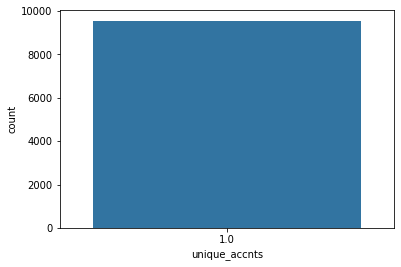

In [12]:
#checking by graph, number of unique accounts
sns.countplot(data=fdd_data,x='unique_accnts')

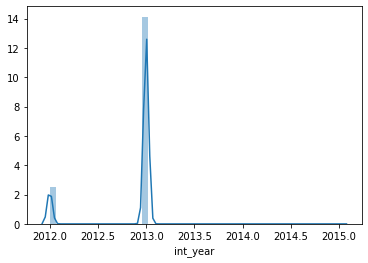

In [15]:
#checking by graph, number of int_year
sns.distplot(fdd_data.int_year)

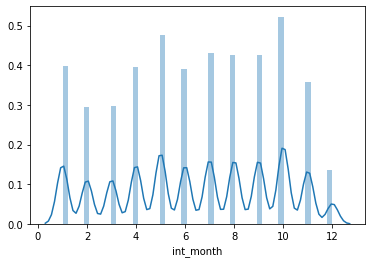

In [16]:
#checking by graph, number of int_month
sns.distplot(fdd_data.int_month)

In [17]:
%matplotlib inline